# The KS test for DeepState model epochs 100

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [2]:
from src.RQ1_forecast import *

In [3]:
pd.options.display.max_columns = None

In [4]:
def first_horizon_ks(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(168*i, 168*i+24)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

def first_horizon_ks_exchange(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(i*30, i*30+30)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

In [5]:
model_name = 'state'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)


# Electricity

101it [00:00, 31691.83it/s]
100%|###########| 100/100 [05:50<00:00,  3.50s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_state_electricity_both_ep100 is =0.1729428451178451

---------------------------------------------



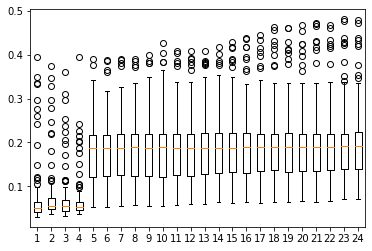

In [6]:
model_name = config['model_name']
dataset_name = "electricity_both_ep100" 
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')


In [40]:
print(f'the mean is {ks_array_electricity.mean()}')

the mean is 0.1729428451178451


In [41]:
pd.DataFrame({'mean' : ks_array_electricity.mean(axis=0),'std' :ks_array_electricity.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.076477,0.079380,0.075378,0.070408,0.179503,0.181406,0.182743,0.184412,0.186135,0.188848,0.189836,0.190949,0.191832,0.192265,0.194269,0.195430,0.195756,0.198028,0.198313,0.198477,0.200424,0.199436,0.200376,0.200545
std,0.074602,0.067599,0.060925,0.053878,0.072620,0.073992,0.075637,0.075864,0.077508,0.080051,0.080092,0.081011,0.081179,0.080915,0.084750,0.086281,0.085226,0.088894,0.088794,0.087987,0.091866,0.088488,0.089943,0.089956


# Solar_nips

101it [00:00, 31171.80it/s]
100%|###########| 100/100 [00:25<00:00,  3.87it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of state_solar_nips_both_ep100 is =0.047348653198653196

---------------------------------------------



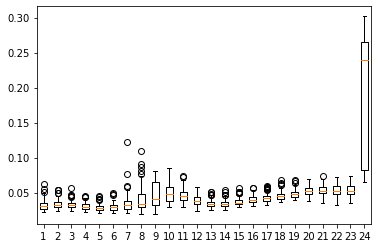

In [37]:
dataset_name = 'solar_nips_both_ep100'
if config[dataset_name] is not None:
    ks_array_solar = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=137, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_solar)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')



In [38]:
print(f'the mean is {ks_array_solar.mean()}')

the mean is 0.047348653198653196


In [39]:
pd.DataFrame({'mean' : ks_array_solar.mean(axis=0),'std' :ks_array_solar.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.031949,0.033723,0.032917,0.030416,0.028178,0.029424,0.034580,0.04118,0.047586,0.049392,0.046137,0.039624,0.034624,0.034461,0.036842,0.039980,0.042364,0.045356,0.048727,0.052212,0.053057,0.053208,0.053208,0.197222
std,0.007563,0.006401,0.005063,0.004937,0.004725,0.005459,0.012825,0.01759,0.017083,0.013182,0.008679,0.007873,0.005462,0.005213,0.005450,0.005592,0.005926,0.005818,0.005996,0.006683,0.007431,0.008566,0.008367,0.085227


# Exchange rate

101it [00:00, 34069.87it/s]
100%|###########| 100/100 [00:01<00:00, 57.27it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
Mean of state_exchange_rate_both_ep100 is =0.2859808501683502

---------------------------------------------



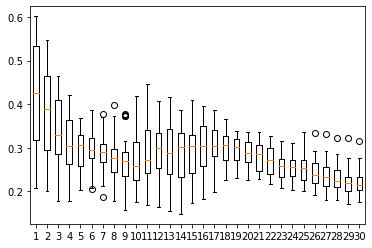

In [31]:
dataset_name = "exchange_rate_both_ep100"
if config[dataset_name] is not None:
    ks_array_exchange = first_horizon_ks_exchange(data_address_val=config[dataset_name], num_time_series=8, train_series_number_ks=32, prediction_length=30, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_exchange)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [35]:
print(f'the mean is {ks_array_exchange.mean()}')

the mean is 0.2859808501683502


In [36]:
pd.DataFrame({'mean' : ks_array_exchange.mean(axis=0),'std' :ks_array_exchange.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,0.422304,0.382696,0.341490,0.313056,0.295758,0.292879,0.290410,0.278125,0.269962,0.268245,0.290745,0.294085,0.291054,0.290133,0.295057,0.307222,0.308718,0.302885,0.294905,0.286768,0.281016,0.270581,0.258207,0.252734,0.251395,0.242393,0.235859,0.227412,0.221098,0.222235
std,0.114863,0.097442,0.076767,0.061987,0.046570,0.046814,0.044779,0.049621,0.052279,0.055382,0.065304,0.060737,0.065990,0.067154,0.062452,0.054769,0.043645,0.037218,0.029785,0.030147,0.031667,0.032499,0.028977,0.026464,0.029754,0.032076,0.033383,0.032267,0.031662,0.032112


# Traffic_nips

1it [00:00,  5.63it/s]reading the experiemtns
101it [00:00, 187.66it/s]
100%|###########| 100/100 [22:31<00:00, 13.51s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of state_traffic_nips_both_ep100 is =0.15043804713804712

---------------------------------------------



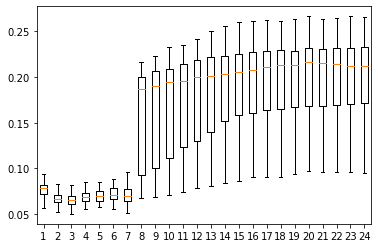

In [32]:
dataset_name = 'traffic_nips_both_ep100'
if config[dataset_name] is not None:
    ks_array_traffic = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=963, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_traffic)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [33]:
print(f'the mean is {ks_array_traffic.mean()}')

the mean is 0.15043804713804712


In [34]:
pd.DataFrame({'mean' : ks_array_traffic.mean(axis=0),'std' :ks_array_traffic.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.077422,0.067343,0.065739,0.068836,0.070168,0.071875,0.071549,0.154335,0.159760,0.164618,0.170246,0.175285,0.179743,0.182521,0.185743,0.188463,0.190459,0.192158,0.193135,0.194226,0.195453,0.196356,0.197057,0.198022
std,0.007515,0.005746,0.006264,0.006756,0.007027,0.007926,0.009176,0.052212,0.052166,0.051371,0.050960,0.050718,0.050079,0.049123,0.048837,0.048517,0.048187,0.048007,0.047538,0.047299,0.047417,0.047413,0.047186,0.047104
